In [3]:
import datajoint as dj

In [4]:
schema = dj.Schema('dimitri_blobs')

Connecting dimitri@db.ust-db.link:3306


In [5]:
@schema
class Student(dj.Manual):
    definition = """
    student_id : int 
    ---
    custom_info : longblob
    """
    

In [6]:
Student.insert1((1, [1, 2, 3, 4]))

In [7]:
Student()

*student_id    custom_inf
+------------+ +--------+
1              =BLOB=    
 (Total: 1)

In [8]:
import json


In [21]:
a = {'array':  [1, 2, 3, 4], 1: "one"}

In [22]:
blob = json.dumps(a)

In [23]:
json.loads(blob)

{'array': [1, 2, 3, 4], '1': 'one'}

In [24]:
import numpy as np

In [27]:
json.dumps(np.random.randn(3, 4))

TypeError: Object of type ndarray is not JSON serializable

In [28]:
import pickle 

In [29]:
import marshal

In [30]:
help(marshal)

Help on built-in module marshal:

NAME
    marshal

MODULE REFERENCE
    https://docs.python.org/3.9/library/marshal
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module contains functions that can read and write Python values in
    a binary format. The format is specific to Python, but independent of
    machine architecture issues.
    
    Not all Python object types are supported; in general, only objects
    whose value is independent from a particular invocation of Python can be
    written and read by this module. The following types are supported:
    None, integers, floating point numbers, strings, bytes, bytearrays,
    tuples, lists, sets, dictionaries, and code objects, where i

In [31]:
import os
import requests
import imageio
import datajoint as dj

In [32]:
def download_file(url, local_file=None):
    local_file = local_file or os.path.join(os.path.abspath('.'), url.split('/')[-1])
    with open(local_file, 'wb') as f:
        f.write(requests.get(url).content)
    return local_file

In [33]:
file = download_file("https://upload.wikimedia.org/wikipedia/commons/d/d3/Geikie_Plateau_Glacier.JPG")

In [34]:
img = imageio.imread(file)

In [35]:
%matplotlib inline
from matplotlib import pyplot as plt

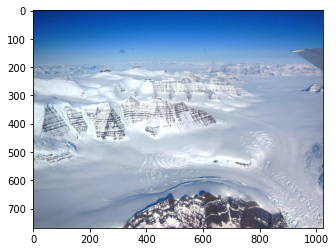

In [36]:
plt.imshow(img)

In [37]:
{'picture': img, 'description': 'glacier'}

{'picture': Array([[[  1,  45, 118],
         [  0,  43, 116],
         [  0,  41, 114],
         ...,
         [  9,  54, 139],
         [  8,  53, 138],
         [  6,  51, 136]],
 
        [[  0,  44, 117],
         [  0,  43, 116],
         [  0,  43, 116],
         ...,
         [ 11,  55, 142],
         [  9,  53, 140],
         [  8,  52, 139]],
 
        [[  0,  43, 116],
         [  0,  44, 117],
         [  1,  45, 118],
         ...,
         [ 10,  54, 141],
         [ 10,  54, 141],
         [  9,  53, 140]],
 
        ...,
 
        [[110, 122, 136],
         [114, 126, 140],
         [112, 124, 138],
         ...,
         [210, 200, 208],
         [194, 184, 192],
         [193, 182, 190]],
 
        [[110, 122, 136],
         [114, 126, 140],
         [111, 123, 137],
         ...,
         [199, 188, 204],
         [185, 172, 189],
         [186, 173, 190]],
 
        [[112, 124, 138],
         [116, 128, 142],
         [113, 125, 139],
         ...,
         [188, 17

In [38]:
import datajoint as dj

In [39]:
schema = dj.schema('dimitri_images')

In [40]:
@schema
class Image(dj.Manual):
    definition = """
    image_name : varchar(12)
    ---
    image_description : varchar(100)
    image : longblob    
    """

In [41]:
Image.insert1(dict(image_name='glacier', image_description="from wikimedia commons", image=img))

In [42]:
Image()

*image_name    image_descript image     
+------------+ +------------+ +--------+
glacier        from wikimedia =BLOB=    
 (Total: 1)

In [43]:
dj.blob.pack(img)

b'ZL123\x00-\x00$\x00\x00\x00\x00\x00x\x9cT\xbc\x85{\x9bw\xb7-\xd86\x0e:\x8e!q\x98\n\xa1&)\xa7\x906I!\xd4\xa6MS\x08\xa7I\x1a2\x83\x8c\x92e\x91-\xcb\xb2X\xb2\xcc\xcc\xcc\xcc\xb6\x98\xd9BC\xa0i{\xbes\xcf\xb9s\x9f\x99?`\xf6~\xdd\xef<3om\xd9\x92\xed\xc6\x96\xd6^{\xad\r\xbf\x84\x9b\t\xaf|\xb5\xea\x95\x7f\xae\x7f\x7f\x12\xf4\xff\xbf\xbb\xfe\x9f\x8f\xaf\xe2{\xd0\xea5\xf81h\xf5\xab\xaf\xac^\xbdfMP\xd0\xaa\xd7^ym\xd5\xaa\xa05kV\xadY\xb3f\xed\xba\xf5\xeb7\xac\xdf\xb0qcpp\xf0\x86u\x1b6n\xda\x14\xb2)<|SHp\xf0\xc6\xd0\xf0\x8d!\xa1a!\x9b\xc2\xc27\x87o\xde\x1c\x1e\x16\x16\xba%4<2bs\xe4\xe6\x8d\xe1\x91\x91[w\xec\xdc\xb1i\xf3\xd6\xc8m\xbb\xf7\xec\xdc\xb5c\xc7\xee\xbd{\xf7\xec\xdd\xbdw\xdf[o\x1f>t\xe4\xf0\xc1\x03\x07\x0e\x1d9z\xec\xf0\xdb\xc7\xdf{\xf7\xdd\x0f>\xf9\xf4\xe4\xe9/>\xf9\xe2\x9b\xafO\x9d\xf9\xf2\xf4\x97\xe7\x7f\xb8\xfc\xed\x85\x0b\xdf~\xf7\xdd\x0fW.]\xf9\xe5\xd7\x9b\xb7o\xde\xbcy\xfb\xb7{\x0f~\xbf\x7f\xef\xf6\xed\xdf\x1fE\xc5D?\x89\x8bOHJ\xcb\xc8H\'\xa7r\xd2\x933\x1e\xa5\xa5\xc5>\xfc=6>1\x87,

In [44]:
Image.insert1(('python obj', 'a dict', {'picture': img, 'description': 'glacier'}))

In [45]:
Image()

*image_name    image_descript image     
+------------+ +------------+ +--------+
glacier        from wikimedia =BLOB=    
python obj     a dict         =BLOB=    
 (Total: 2)

In [46]:
r = Image.fetch('image')

In [47]:
r[0]

array([[[  1,  45, 118],
        [  0,  43, 116],
        [  0,  41, 114],
        ...,
        [  9,  54, 139],
        [  8,  53, 138],
        [  6,  51, 136]],

       [[  0,  44, 117],
        [  0,  43, 116],
        [  0,  43, 116],
        ...,
        [ 11,  55, 142],
        [  9,  53, 140],
        [  8,  52, 139]],

       [[  0,  43, 116],
        [  0,  44, 117],
        [  1,  45, 118],
        ...,
        [ 10,  54, 141],
        [ 10,  54, 141],
        [  9,  53, 140]],

       ...,

       [[110, 122, 136],
        [114, 126, 140],
        [112, 124, 138],
        ...,
        [210, 200, 208],
        [194, 184, 192],
        [193, 182, 190]],

       [[110, 122, 136],
        [114, 126, 140],
        [111, 123, 137],
        ...,
        [199, 188, 204],
        [185, 172, 189],
        [186, 173, 190]],

       [[112, 124, 138],
        [116, 128, 142],
        [113, 125, 139],
        ...,
        [188, 174, 197],
        [172, 158, 181],
        [174, 159, 182]]

In [48]:
r[1]

{'picture': array([[[  1,  45, 118],
         [  0,  43, 116],
         [  0,  41, 114],
         ...,
         [  9,  54, 139],
         [  8,  53, 138],
         [  6,  51, 136]],
 
        [[  0,  44, 117],
         [  0,  43, 116],
         [  0,  43, 116],
         ...,
         [ 11,  55, 142],
         [  9,  53, 140],
         [  8,  52, 139]],
 
        [[  0,  43, 116],
         [  0,  44, 117],
         [  1,  45, 118],
         ...,
         [ 10,  54, 141],
         [ 10,  54, 141],
         [  9,  53, 140]],
 
        ...,
 
        [[110, 122, 136],
         [114, 126, 140],
         [112, 124, 138],
         ...,
         [210, 200, 208],
         [194, 184, 192],
         [193, 182, 190]],
 
        [[110, 122, 136],
         [114, 126, 140],
         [111, 123, 137],
         ...,
         [199, 188, 204],
         [185, 172, 189],
         [186, 173, 190]],
 
        [[112, 124, 138],
         [116, 128, 142],
         [113, 125, 139],
         ...,
         [188, 17

In [ ]:
Image()

In [49]:
a = np.random.randn(3, 4)

In [50]:
a

array([[-0.19109613,  0.25571486,  0.30957655,  0.09657222],
       [-0.44529504, -0.94592952, -1.71314866, -0.21283089],
       [-0.30381315, -2.59478925, -0.42844231,  2.26425207]])

In [58]:
pickle.loads(a.dumps())

array([[-0.19109613,  0.25571486,  0.30957655,  0.09657222],
       [-0.44529504, -0.94592952, -1.71314866, -0.21283089],
       [-0.30381315, -2.59478925, -0.42844231,  2.26425207]])

In [56]:
marshal.dumps(a)

b'\xf3`\x00\x00\x00Q\x81\xbb\x88\xd6u\xc8\xbf\x08\x8a\xa7\xdd\xa1]\xd0?\xb5\xd1\xb7%\x1a\xd0\xd3?m\xef)\xe9\xf4\xb8\xb8?PGe\xbf\xb6\x7f\xdc\xbf~\x96\x99\xfd\rE\xee\xbf\xc6e\x9d\x90\x0ei\xfb\xbf\x19F\x94\xe5\n>\xcb\xbf\x013\xf8\xb7\xacq\xd3\xbf7\x85g\xdd \xc2\x04\xc0O\x81\xc3N\x99k\xdb\xbf\xec\x8b\xbc00\x1d\x02@'

In [54]:
pickle.dumps(a)

b'\x80\x04\x95\xea\x00\x00\x00\x00\x00\x00\x00\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x03K\x04\x86\x94h\x03\x8c\x05dtype\x94\x93\x94\x8c\x02f8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01<\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00t\x94b\x89C`Q\x81\xbb\x88\xd6u\xc8\xbf\x08\x8a\xa7\xdd\xa1]\xd0?\xb5\xd1\xb7%\x1a\xd0\xd3?m\xef)\xe9\xf4\xb8\xb8?PGe\xbf\xb6\x7f\xdc\xbf~\x96\x99\xfd\rE\xee\xbf\xc6e\x9d\x90\x0ei\xfb\xbf\x19F\x94\xe5\n>\xcb\xbf\x013\xf8\xb7\xacq\xd3\xbf7\x85g\xdd \xc2\x04\xc0O\x81\xc3N\x99k\xdb\xbf\xec\x8b\xbc00\x1d\x02@\x94t\x94b.'

In [60]:
dj.blob.unpack(dj.blob.pack(a))

array([[-0.19109613,  0.25571486,  0.30957655,  0.09657222],
       [-0.44529504, -0.94592952, -1.71314866, -0.21283089],
       [-0.30381315, -2.59478925, -0.42844231,  2.26425207]])